# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# library used to request a API for data
import requests
# time operations
import time
# only importing the linear regression function from scipy
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# wrapper
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# zip = takes two lists and combines them into a list of zipped tuples [(lat, lng), (lat, lng), ...]
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:

    # variable = module.method(argument/conditions).attribute(lookup)
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
from pprint import pprint
city = "wallace" 
url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
r = requests.get(url)
print(r.status_code)
weather = r.json()
print(weather['main']['temp'])
print(weather['weather'][0]['description'])
pprint(weather)

# dictionary_name['key']

200
52.56
clear sky
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 34.74, 'lon': -78},
 'dt': 1604108301,
 'id': 4497385,
 'main': {'feels_like': 47.86,
          'humidity': 93,
          'pressure': 1022,
          'temp': 52.56,
          'temp_max': 54,
          'temp_min': 50},
 'name': 'Wallace',
 'sys': {'country': 'US',
         'id': 3853,
         'sunrise': 1604057469,
         'sunset': 1604096397,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 5, 'speed': 8.77}}


In [13]:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

print(weather['main']['temp'])
print(weather['coord']['lat'])
print(weather['main']['humidity'])
print(weather['clouds']['all'])
print(weather['wind']['speed'])
print(weather['coord']['lon'])
print(weather['main']['temp_max'])
print(weather['sys']['country'])
print(weather['dt'])

52.56
34.74
93
1
8.77
-78
54
US
1604108301


In [14]:
# City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
city_data = {
    'City': weather['name'],
    'Lat': weather['coord']['lat'], 
    'Lng': weather['coord']['lon'],
    'Max Temp': weather['main']['temp_max'],
    'Humidity': weather['main']['humidity'],
    'Cloudiness': weather['clouds']['all'],
    'Wind Speed': weather['wind']['speed'],
    'Country': weather['sys']['country'],
    'Date': weather['dt']  

}
print(city_data)

{'City': 'Wallace', 'Lat': 34.74, 'Lng': -78, 'Max Temp': 54, 'Humidity': 93, 'Cloudiness': 1, 'Wind Speed': 8.77, 'Country': 'US', 'Date': 1604108301}


In [23]:
# print(f'Processing Record 1 of Set 1' + cities
count = 1
set_num = 1
city_info = []

print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    print(f"Processing Record {count} of Set {set_num} | {city}")
    
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    try:
        r = requests.get(url)
        weather = r.json()

        city_data = {
            'City': weather['name'],
            'Lat': weather['coord']['lat'], 
            'Lng': weather['coord']['lon'],
            'Max Temp': weather['main']['temp_max'],
            'Humidity': weather['main']['humidity'],
            'Cloudiness': weather['clouds']['all'],
            'Wind Speed': weather['wind']['speed'],
            'Country': weather['sys']['country'],
            'Date': weather['dt']  
        }
        city_info.append(city_data)
    except KeyError:
        print('City not found. Skipping...')
    
    count += 1
    if count == 51:  
        set_num += 1
        count = 1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | ekibastuz
Processing Record 5 of Set 1 | tocopilla
Processing Record 6 of Set 1 | moussoro
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | atambua
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | chifeng
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | novyy urengoy
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | huangnihe
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | high rock
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | marcona
City not found. Skipping...
Processing Record 22 of Set

Processing Record 39 of Set 4 | carauari
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | nhulunbuy
Processing Record 42 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 43 of Set 4 | lasa
Processing Record 44 of Set 4 | guayaramerin
Processing Record 45 of Set 4 | springbok
Processing Record 46 of Set 4 | bilibino
Processing Record 47 of Set 4 | takoradi
Processing Record 48 of Set 4 | hailar
Processing Record 49 of Set 4 | malwan
City not found. Skipping...
Processing Record 50 of Set 4 | san isidro
Processing Record 1 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 5 | bolshoy tsaryn
City not found. Skipping...
Processing Record 3 of Set 5 | galiwinku
City not found. Skipping...
Processing Record 4 of Set 5 | duz
City not found. Skipping...
Processing Record 5 of Set 5 | spring hill
Processing Record 6 of Set 5 | snizhne
Processing Record 7 of Set 5 | fortuna
Processing Record 8 of Set 5 | opuwo
Processing Re

Processing Record 25 of Set 8 | quatre cocos
Processing Record 26 of Set 8 | presidente epitacio
Processing Record 27 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 28 of Set 8 | iracoubo
Processing Record 29 of Set 8 | aykhal
Processing Record 30 of Set 8 | dikson
Processing Record 31 of Set 8 | ghanzi
Processing Record 32 of Set 8 | svetlyy
Processing Record 33 of Set 8 | thunder bay
Processing Record 34 of Set 8 | iqaluit
Processing Record 35 of Set 8 | saint-augustin
Processing Record 36 of Set 8 | bandundu
Processing Record 37 of Set 8 | waldheim
Processing Record 38 of Set 8 | shubarkuduk
Processing Record 39 of Set 8 | chase
Processing Record 40 of Set 8 | kyaikkami
Processing Record 41 of Set 8 | faya
Processing Record 42 of Set 8 | hambantota
Processing Record 43 of Set 8 | seymchan
Processing Record 44 of Set 8 | calabar
Processing Record 45 of Set 8 | port blair
Processing Record 46 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 47 of S

Processing Record 15 of Set 12 | porto velho
Processing Record 16 of Set 12 | ust-nera
Processing Record 17 of Set 12 | richards bay
Processing Record 18 of Set 12 | bowen
Processing Record 19 of Set 12 | vanavara
Processing Record 20 of Set 12 | ha tinh
Processing Record 21 of Set 12 | ipora
Processing Record 22 of Set 12 | chokwe
Processing Record 23 of Set 12 | isabela
Processing Record 24 of Set 12 | ayr
Processing Record 25 of Set 12 | monatele
City not found. Skipping...
Processing Record 26 of Set 12 | suwannaphum
Processing Record 27 of Set 12 | koumac
Processing Record 28 of Set 12 | saint-pierre
Processing Record 29 of Set 12 | saint anthony
Processing Record 30 of Set 12 | honningsvag
Processing Record 31 of Set 12 | namibe
Processing Record 32 of Set 12 | sharkan
Processing Record 33 of Set 12 | sechura
Processing Record 34 of Set 12 | ambilobe
Processing Record 35 of Set 12 | cabedelo
Processing Record 36 of Set 12 | ambulu
Processing Record 37 of Set 12 | wagar
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
weather_df = pd.DataFrame(city_info)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,53.01,88,100,11.99,NZ,1604115127
1,Rikitea,-23.12,-134.97,76.10,64,0,2.66,PF,1604115799
2,Cabo San Lucas,22.89,-109.91,75.20,69,20,3.36,MX,1604115184
3,Ekibastuz,51.67,75.37,38.12,78,100,4.25,KZ,1604115259
4,Tocopilla,-22.09,-70.20,62.29,59,2,3.91,CL,1604115259


In [25]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,18.495318,19.098566,58.536624,73.829401,52.613430,7.693267,1.604116e+09
std,33.054749,90.483738,22.843212,19.374677,39.834582,5.738563,1.886364e+02
min,-54.800000,-179.170000,-10.070000,11.000000,0.000000,0.200000,1.604115e+09
25%,-8.560000,-64.115000,43.845000,63.000000,5.500000,3.360000,1.604116e+09
50%,18.430000,25.570000,62.600000,78.000000,58.000000,5.820000,1.604116e+09
75%,47.635000,103.515000,77.190000,88.000000,91.500000,10.770000,1.604116e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,38.450000,1.604116e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
# filter if there were some over 100
# filter example - combined_data[combined_data['Sex'] == 'Female']
weather_df[weather_df['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [39]:
# if there were remove them
clean_city_data = weather_df[weather_df['Humidity'] <= 100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,53.01,88,100,11.99,NZ,1604115127
1,Rikitea,-23.12,-134.97,76.10,64,0,2.66,PF,1604115799
2,Cabo San Lucas,22.89,-109.91,75.20,69,20,3.36,MX,1604115184
3,Ekibastuz,51.67,75.37,38.12,78,100,4.25,KZ,1604115259
4,Tocopilla,-22.09,-70.20,62.29,59,2,3.91,CL,1604115259
...,...,...,...,...,...,...,...,...,...
546,Biasca,46.36,8.97,41.00,100,0,5.12,CH,1604115810
547,San Cristobal,7.77,-72.22,67.78,92,98,2.53,VE,1604115895
548,Boshnyakovo,49.63,142.17,41.13,67,84,6.46,RU,1604115895
549,Dire Dawa,9.59,41.87,70.12,59,54,3.51,ET,1604115895


In [37]:
#  Get the indices of cities that have humidity over 100%.
# weather_df[weather_df['Humidity'] > 100].index[0]

In [38]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# weather_df.drop(weather_df['Humidity'] > 100, inplace=False)

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

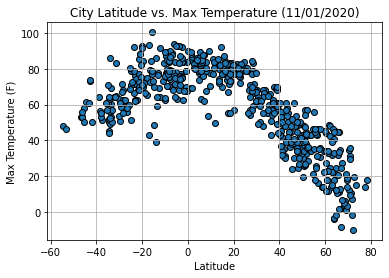

In [50]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], edgecolors='black' )
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (11/01/2020)')
plt.grid()
plt.savefig('lat_vs_maxtemp')

## Latitude vs. Humidity Plot

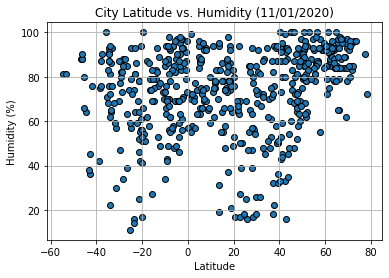

In [51]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], edgecolors='black' )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (11/01/2020)')
plt.grid()
plt.savefig('lat_vs_humidity')

## Latitude vs. Cloudiness Plot

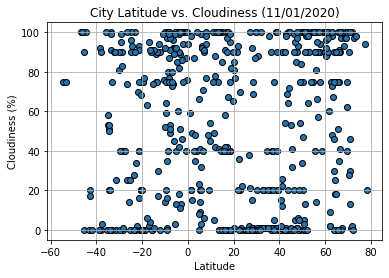

In [52]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], edgecolors='black' )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (11/01/2020)')
plt.grid()
plt.savefig('lat_vs_cloudiness')

## Latitude vs. Wind Speed Plot

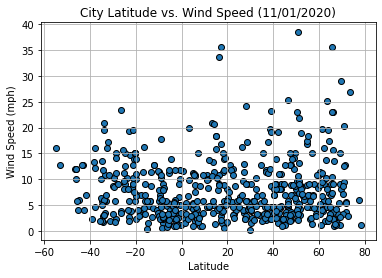

In [53]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], edgecolors='black' )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (11/01/2020)')
plt.grid()
plt.savefig('lat_vs_windspeed')

## Linear Regression

In [59]:
northern_hem = clean_city_data[clean_city_data['Lat'] >= 0]
northern_hem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Cabo San Lucas,22.89,-109.91,75.20,69,20,3.36,MX,1604115184
3,Ekibastuz,51.67,75.37,38.12,78,100,4.25,KZ,1604115259
5,Moussoro,13.64,16.49,79.63,19,0,13.31,TD,1604115260
6,Bethel,41.37,-73.41,30.99,92,1,4.14,US,1604115260
9,Chifeng,42.27,118.96,54.01,33,0,19.08,CN,1604115261
...,...,...,...,...,...,...,...,...,...
546,Biasca,46.36,8.97,41.00,100,0,5.12,CH,1604115810
547,San Cristobal,7.77,-72.22,67.78,92,98,2.53,VE,1604115895
548,Boshnyakovo,49.63,142.17,41.13,67,84,6.46,RU,1604115895
549,Dire Dawa,9.59,41.87,70.12,59,54,3.51,ET,1604115895


In [60]:
southern_hem = clean_city_data[clean_city_data['Lat'] <= 0]
southern_hem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,53.01,88,100,11.99,NZ,1604115127
1,Rikitea,-23.12,-134.97,76.10,64,0,2.66,PF,1604115799
4,Tocopilla,-22.09,-70.20,62.29,59,2,3.91,CL,1604115259
7,Atambua,-9.11,124.89,89.24,43,1,2.84,ID,1604115260
8,Atuona,-9.80,-139.03,77.72,76,64,11.43,PF,1604115260
...,...,...,...,...,...,...,...,...,...
539,Ambilobe,-13.20,49.05,76.62,53,17,8.72,MG,1604115457
540,Cabedelo,-6.98,-34.83,78.80,83,75,5.82,BR,1604115894
541,Ambulu,-8.35,113.61,79.00,81,99,6.04,ID,1604115514
543,Pringsewu,-5.36,104.97,92.52,49,92,2.13,ID,1604115894


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8022634944615179


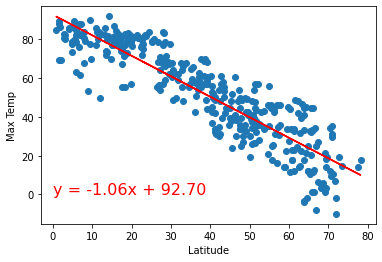

In [81]:
x = northern_hem['Lat']
y = northern_hem['Max Temp']

slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"The r-value is: {r_value ** 2}")

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.text(0, 0, f"y = {slope:.2f}x + {intercept:.2f}", color="red", fontsize=16)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("northern_temp_vs_lat")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3941237048013157


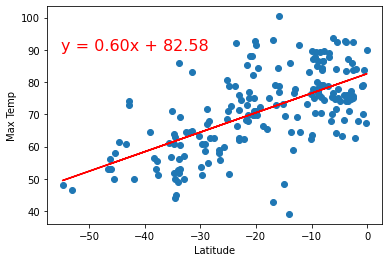

In [79]:
x = southern_hem['Lat']
y = southern_hem['Max Temp']

slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"The r-value is: {r_value ** 2}")

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.text(-55, 90, f"y = {slope:.2f}x + {intercept:.2f}", color="red", fontsize=16)
# plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("southern_temp_vs_lat")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10615841989031362


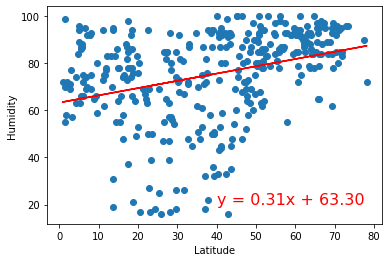

In [85]:
x = northern_hem['Lat']
y = northern_hem['Humidity']

slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"The r-value is: {r_value ** 2}")

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.text(40, 20, f"y = {slope:.2f}x + {intercept:.2f}", color="red", fontsize=16)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("northern_temp_vs_humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


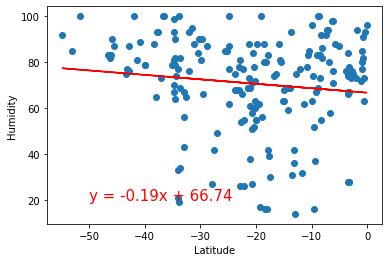

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


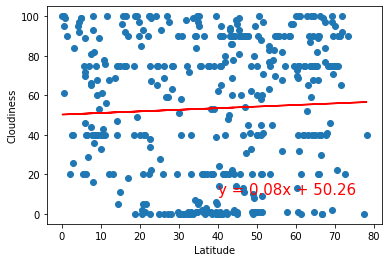

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


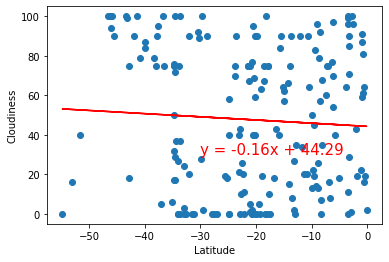

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


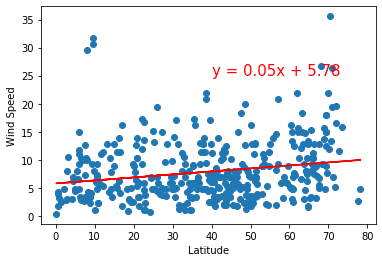

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


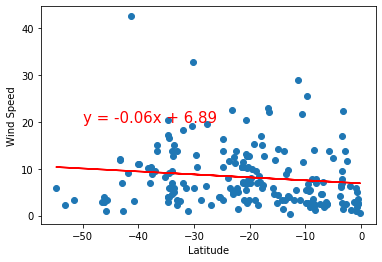